In [2]:
words = open('names.txt', 'r').read().splitlines()


In [2]:
print(len(words))
print(min(len(w) for w in words))
print(max(len(w) for w in words))

32033
2
15


In [3]:
b = {}
for w in words:
    w = ['<S>'] + list(w) + ['<E>']
    for chr1, chr2 in zip(w, w[1:]):
        bigram = (chr1, chr2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(chr1, chr2)

print(b)

{('<S>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<E>'): 6640, ('<S>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<S>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<S>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<S>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<S>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<E>'): 3983, ('<S>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<S>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<E>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<E>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1345,

In [5]:
import torch

## Build numeric mapping for the 26 letters 

In [63]:
letters = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(letters)}
stoi['.'] = 0

stoi.items()
# stoi['<S>'] = 26
# stoi['<E>'] = 27

dict_items([('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10), ('k', 11), ('l', 12), ('m', 13), ('n', 14), ('o', 15), ('p', 16), ('q', 17), ('r', 18), ('s', 19), ('t', 20), ('u', 21), ('v', 22), ('w', 23), ('x', 24), ('y', 25), ('z', 26), ('.', 0)])

In [64]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [54]:
# N = torch.zeros((28, 28), dtype=torch.int32)
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
    # w = ['<S>'] + list(w) + ['<E>']
    w = ['.'] + list(w) + ['.']
    for chr1, chr2 in zip(w, w[1:]):
        row = stoi[chr1]
        col = stoi[chr2]
        N[row, col] += 1
        # print(chr1, chr2)

print(N)

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(-0.5, 26.5, 26.5, -0.5)

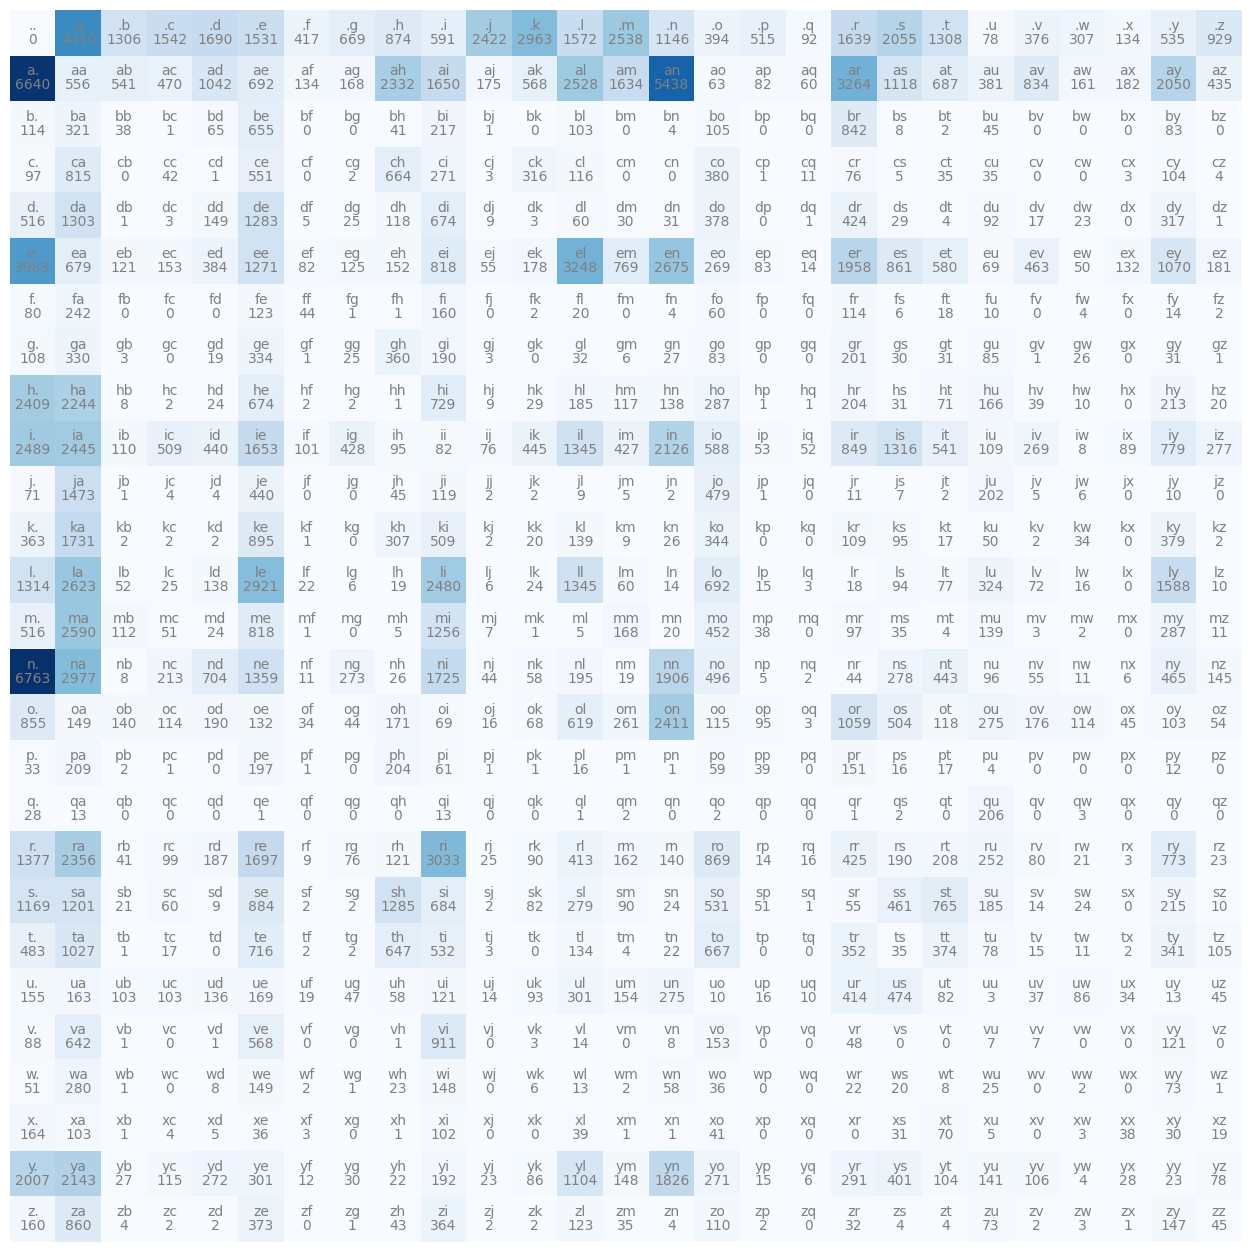

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray' )
plt.axis('off')

# Sample from the model 

In [76]:
# Test generator for reproducibility purpose
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p /= p.sum()

p


tensor([0.6064, 0.3033, 0.0903])

In [100]:
cnt = N[0, :].float()
cnt 

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [86]:
p = N[0, :].float()
p /= p.sum()

p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [93]:
s = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
s


13

In [99]:
p = torch.ones(27) / 27
p

tensor([0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370,
        0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370,
        0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370])

In [105]:
for i in range(20):
    ix = 0
    res = []
    while True:
        p = N[ix].float()
        p /= p.sum()
        ## If we were to sample the 27 letters uniformly (prove the model weights are better than random)
        # p = torch.ones(27) / 27.0 
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        res.append(itos[ix])
        if ix == 0:
            break   
    print(''.join(res))


celyziya.
ja.
am.
kis.
sanza.
kaeme.
mauelelelemarelyntyrk.
mano.
gojeren.
kageenokanonniya.
maelehan.
ronnivaerittza.
da.
k.
anlo.
de.
che.
ka.
ay.
ie.


## Optimize runtime with a pre-calculated prob matrix

In [104]:
print(N.shape)

sum = N.sum(dim=1, keepdim=True)
print(sum.shape)

sum_ = N.sum(dim=1)
print(sum_.shape)

torch.Size([27, 27])
torch.Size([27, 1])
torch.Size([27])


In [106]:
## Keep dim is very important here for broadcasting to work!!
## Read more about tensor broadcasting at: https://pytorch.org/docs/stable/notes/broadcasting.html
P = N / N.sum(dim=1, keepdim=True)
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [110]:

for i in range(20):
    ix = 0
    res = []
    while True:
        # p = N[ix].float()
        # p /= p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=False, generator=g).item()
        res.append(itos[ix])
        if ix == 0:
            break   
    print(''.join(res))

t.
a.
ynnayaamimiarybelisllot.
klanayagenielablele.
pi.
my.
darinyn.
jady.
reyalalenlumeaviaysh.
genaysyah.
ey.
penn.
anaxi.
celinstanneheeliyl.
eilshaus.
ke.
arl.
aann.
ayowema.
za.


## Define a loss function to evaluate the bigram model